Importing Libraries

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf

Importing Dataset

In [23]:
dataset = pd.read_csv('car performance.csv')
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Finding missing data

In [24]:
dataset.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

There are no null characters in the columns but there is a special character '?' in the 'horsepower' column. So we we replaced '?' with nan and replaced nan values with mean of the column.

In [25]:
dataset['horsepower']=dataset['horsepower'].replace('?',np.nan)

In [26]:
dataset['horsepower'].isnull().sum()

0

In [27]:
dataset['horsepower']=dataset['horsepower'].astype('float64')

In [28]:
dataset['horsepower'].fillna((dataset['horsepower'].mean()),inplace=True)

In [29]:
dataset.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [30]:
dataset.info() #Pandas dataframe.info() function is used to get a quick overview of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [31]:
dataset.describe() #Pandas describe() is used to view some basic statistical details of a data frame or a series of numeric values.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.165829,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.298676,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


There is no use with car name attribute so drop it

In [32]:
dataset=dataset.drop('car name',axis=1) #dropping the unwanted column.

In [33]:
corr_table=dataset.corr()#Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
corr_table

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.777501,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842437,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897082,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.777501,0.842437,0.897082,1.000000,0.863990,-0.686436,-0.417081,-0.452386
weight,-0.831741,0.896017,0.932824,0.863990,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686436,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.417081,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452386,-0.581024,0.205873,0.180662,1.000000


Data Visualizations

Heatmap : which represents correlation between attributes

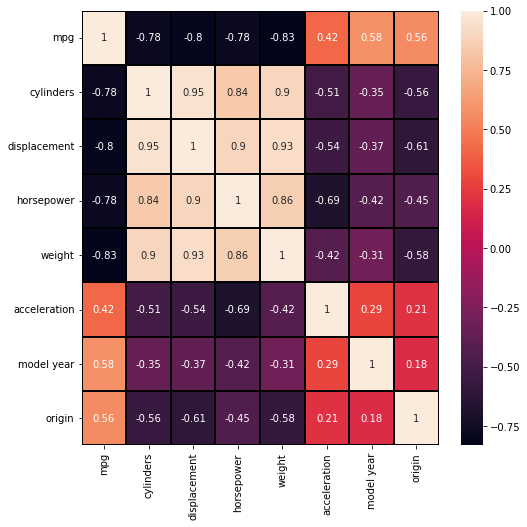

In [34]:
sns.heatmap(dataset.corr(),annot=True,linecolor ='black', linewidths = 1)#Heatmap is a way to show some sort of matrix plot,annot is used for correlation.
fig=plt.gcf()
fig.set_size_inches(8,8)

Visualizations of each attributes w.r.t rest of all attributes

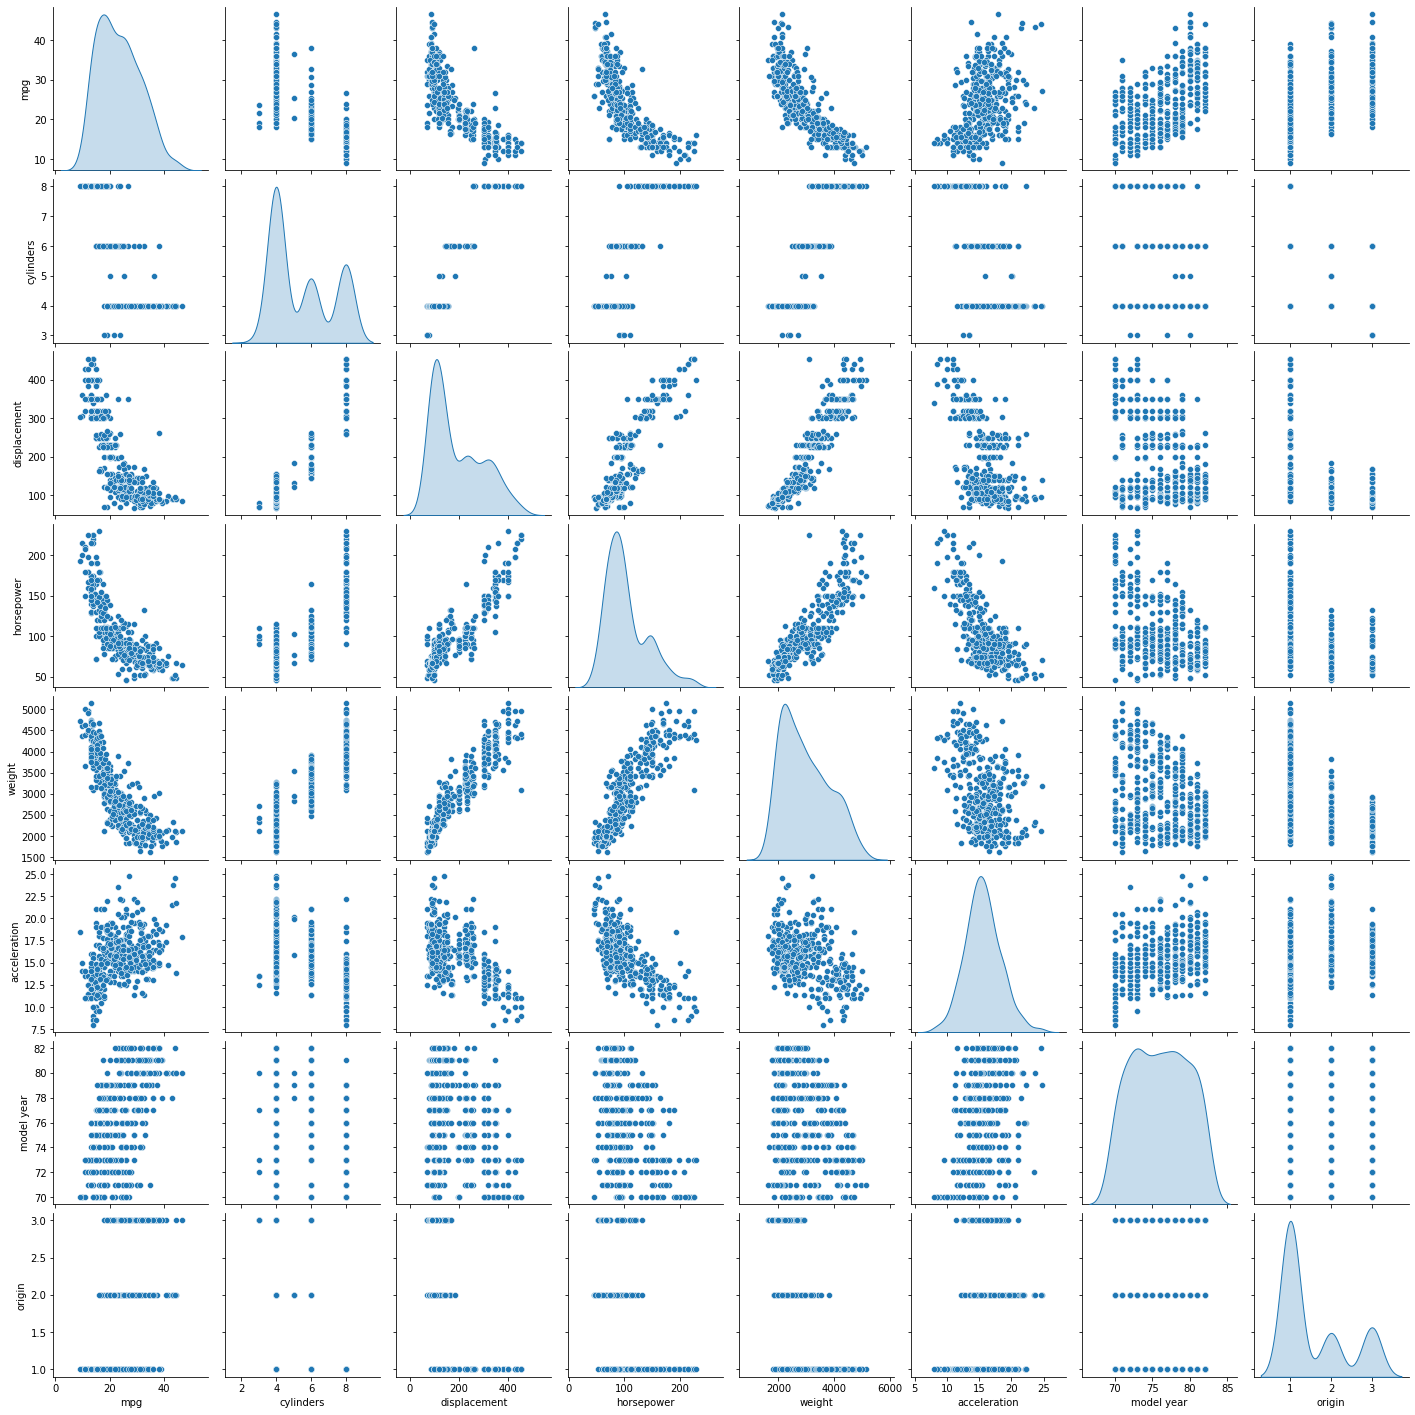

In [35]:
sns.pairplot(dataset,diag_kind='kde') #pairplot represents pairwise relation across the entire dataframe.
plt.show()

Regression plots(regplot()) creates a regression line between 2 parameters and helps to visualize their linear relationships.

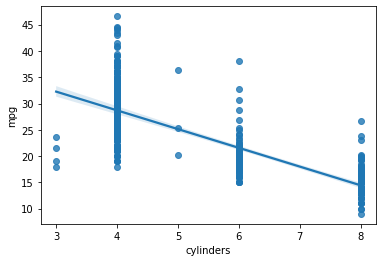

In [37]:
sns.regplot(x="cylinders", y="mpg", data=dataset)

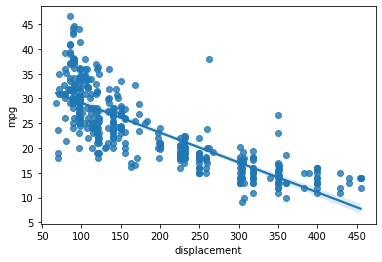

In [38]:
sns.regplot(x="displacement", y="mpg", data=dataset)

sns.regplot(x="horsepower", y="mpg", data=dataset)

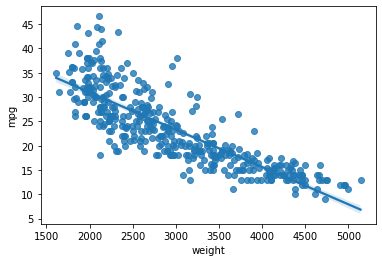

In [39]:
sns.regplot(x="weight", y="mpg", data=dataset)

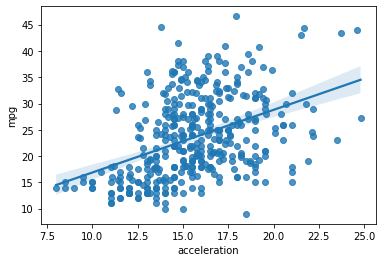

In [40]:
sns.regplot(x="acceleration", y="mpg", data=dataset)

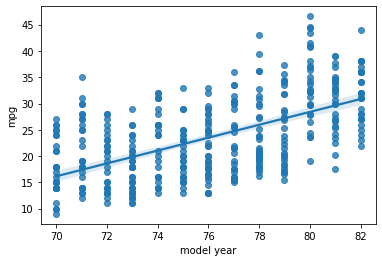

In [41]:
sns.regplot(x="model year", y="mpg", data=dataset)

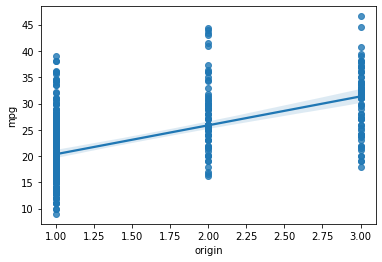

In [42]:
sns.regplot(x="origin", y="mpg", data=dataset)

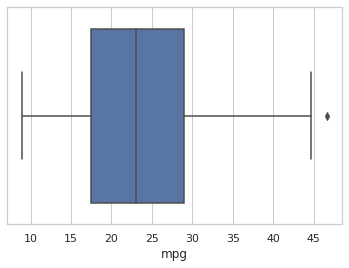

In [43]:
sns.set(style="whitegrid")
sns.boxplot(x=dataset["mpg"])

Finding quartiles for mgp

The P-value is the probability value that the correlation between these two variables is statistically significant.

Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is < 0.001: we say there is strong evidence that the correlation is significant.
the p-value is < 0.05: there is moderate evidence that the correlation is significant.
the p-value is < 0.1: there is weak evidence that the correlation is significant.
the p-value is > 0.1: there is no evidence that the correlation is significant.

In [44]:
from scipy import stats

Cylinders vs mpg

Let's calculate the Pearson Correlation Coefficient and P-value of 'Cylinders' and 'mpg'.

In [45]:
pearson_coef, p_value = stats.pearsonr(dataset['cylinders'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.7753962854205542  with a P-value of P = 4.503992246177055e-81


Conclusion:
Since the p-value is < 0.001, the correlation between cylinders and mpg is statistically significant, and the coefficient of ~ -0.775 shows that the relationship is negative and moderately strong.

Displacement vs mpg

Let's calculate the Pearson Correlation Coefficient and P-value of 'Displacement' and 'mpg'.

In [46]:
pearson_coef, p_value = stats.pearsonr(dataset['displacement'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.8042028248058978  with a P-value of P = 1.6558889101930157e-91


Conclusion:
Since the p-value is < 0.1, the correlation between displacement and mpg is statistically significant, and the linear negative relationship is quite strong (~-0.809, close to -1)

Horsepower vs mpg

Let's calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'mpg'.

In [47]:
pearson_coef, p_value = stats.pearsonr(dataset['horsepower'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.7775013636276671  with a P-value of P = 8.802190914914203e-82


Conclusion:
Since the p-value is < 0.001, the correlation between horsepower and mpg is statistically significant, and the coefficient of ~ -0.771 shows that the relationship is negative and moderately strong.

Weght vs mpg

Let's calculate the Pearson Correlation Coefficient and P-value of 'weight' and 'mpg'.

In [48]:
pearson_coef, p_value = stats.pearsonr(dataset['weight'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.831740933244335  with a P-value of P = 2.9727995640500577e-103


Conclusion:
Since the p-value is < 0.001, the correlation between weight and mpg is statistically significant, and the linear negative relationship is quite strong (~-0.831, close to -1)

Acceleration vs mpg

Let's calculate the Pearson Correlation Coefficient and P-value of 'Acceleration' and 'mpg'.

In [49]:
pearson_coef, p_value = stats.pearsonr(dataset['acceleration'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.4202889121016507  with a P-value of P = 1.823091535078553e-18


Conclusion:
Since the p-value is > 0.1, the correlation between acceleration and mpg is statistically significant, but the linear relationship is weak (~0.420).

Model year vs mpg

Let's calculate the Pearson Correlation Coefficient and P-value of 'Model year' and 'mpg'.

In [50]:
pearson_coef, p_value = stats.pearsonr(dataset['model year'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5792671330833096  with a P-value of P = 4.844935813365483e-37


Conclusion:
Since the p-value is < 0.001, the correlation between model year and mpg is statistically significant, but the linear relationship is only moderate (~0.579).

Origin vs mpg



Let's calculate the Pearson Correlation Coefficient and P-value of 'Origin' and 'mpg'.

In [51]:
pearson_coef, p_value = stats.pearsonr(dataset['origin'], dataset['mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5634503597738431  with a P-value of P = 1.0114822102336483e-34


Conclusion:
Since the p-value is < 0.001, the correlation between origin and mpg is statistically significant, but the linear relationship is only moderate (~0.563).

Ordinary Least Squares Statistics

In [52]:
test=smf.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+origin',dataset).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     167.6
Date:                Tue, 22 Nov 2022   Prob (F-statistic):          8.18e-105
Time:                        02:02:21   Log-Likelihood:                -1129.2
No. Observations:                 398   AIC:                             2272.
Df Residuals:                     391   BIC:                             2300.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       43.4941      2.690     16.171      0.000      38.206      48.782
cylinders       -0.5537      0.402     -1.377      0.169      -1.344       0.237
displacement     0.0125      0.009      1.335      0.183      -0.006       0.031
horsepower      -0.0628      0.017     -3.797      0.000      -0.095      -0.030
weight          -0.0049      0.001     -6.168      0.000      -0.006      -0.003
acceleration    -0.0402      0.121     -0.332      0.740      -0.278       0.198
origin           1.4880      0.345      4.315      0.000       0.810       2.166
==============================================================================
Omnibus:                       31.632   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.557
Skew:                           0.613   Prob(JB):                     9.46e-10
Kurtosis:                       4.002   Cond. No.                     4.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Inference as in the above summary the p value of the accelaration is maximum(i.e 0.972) so we can remove the acc variable from the dataset

Seperating into Dependent and Independent variables

Independent variables

In [53]:
x=dataset[['cylinders','displacement','horsepower','weight','model year','origin']].values
x

array([[8.000e+00, 3.070e+02, 1.300e+02, 3.504e+03, 7.000e+01, 1.000e+00],
       [8.000e+00, 3.500e+02, 1.650e+02, 3.693e+03, 7.000e+01, 1.000e+00],
       [8.000e+00, 3.180e+02, 1.500e+02, 3.436e+03, 7.000e+01, 1.000e+00],
       ...,
       [4.000e+00, 1.350e+02, 8.400e+01, 2.295e+03, 8.200e+01, 1.000e+00],
       [4.000e+00, 1.200e+02, 7.900e+01, 2.625e+03, 8.200e+01, 1.000e+00],
       [4.000e+00, 1.190e+02, 8.200e+01, 2.720e+03, 8.200e+01, 1.000e+00]])

Dependent variables

In [54]:
y=dataset.iloc[:,0:1].values
y

array([[18. ],
       [15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [14. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [14. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17

Normalizing

In [55]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
x_train = sd.fit_transform(x_train)
x_test = sd.fit_transform(x_test)
y_train = sd.fit_transform(y_train)
y_test = sd.fit_transform(y_test)

x_train

NameError: ignored

Splitting into train and test data.

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

we are splitting as 90% train data and 10% test data

random forest regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rf= RandomForestRegressor(n_estimators=10)
rf.fit(x_train,np.ravel(y_train))

RandomForestRegressor(n_estimators=10)

In [60]:
x_train.shape

(318, 6)

In [61]:
!pip install ibm-watson-machine-learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 51 kB 745 kB/s 
     |████████████████████████████████| 824 kB 41.3 MB/s 
     |████████████████████████████████| 133 kB 53.8 MB/s 
     |████████████████████████████████| 547 kB 46.6 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72567 sha256=75f3f46ff72c5eb45594e59098e2372d78679ba6b860ccbe69cb27d01619776f
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501011 sha256=eca33b70a615a64d325aa68f5c9371e9a268d4537e79bd13131819d7034865af
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [62]:
from ibm_watson_machine_learning import APIClient 
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"k0ToNjB4fREMsVxEr0C3pjHT0bNJzgZvVt1S0SikVpMJ",
    
}
client = APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [63]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [64]:
space_uid = guid_from_space_name(client, 'models')
print("Space UID-" + space_uid) 

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/d12096019c744baabc99e2caa9c44ac5:dbc6da1f-aca8-4c0f-937f-da20bd5e08c6::', 'guid': 'dbc6da1f-aca8-4c0f-937f-da20bd5e08c6', 'name': 'Watson Machine Learning-72', 'type': 'machine_learning'}], 'description': '', 'name': 'models', 'scope': {'bss_account_id': 'd12096019c744baabc99e2caa9c44ac5'}, 'stage': {'production': False}, 'status': {'state': 'active'}, 'storage': {'properties': {'bucket_name': '2e6d79af-2319-41ef-8bb1-13843958cd79', 'bucket_region': 'us-south', 'credentials': {'admin': {'access_key_id': 'e2dcdab6300f4292acfd3a9e99fe8419', 'api_key': 'Ccb36wfmVayFlvEWymudO7rYIVHUT18VXxjXXSf8wNVx', 'secret_access_key': '09d27d5ba8570a63f8ecd4477903c61c66702acd0a8a0cb2', 'service_id': 'ServiceId-113a7385-0acf-4aca-b0a4-f20ee5949b94'}, 'editor': {'access_key_id': '0b31cfa63a054a40bbe5cbe6a1ddc189', 'api_key': 'Nrtr6aPyPH387BlYG2rJrcg3kiA1-ZVXbGR3J7CZQK9e', 'resource_key_crn': 'crn:v1:bluemix:public:cloud

In [65]:
client.set.default_space(space_uid)

'SUCCESS'

In [66]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [67]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.8")
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [68]:
!pip install -U pyspark==2.1.2.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 181.3 MB 24 kB/s 
     |████████████████████████████████| 186 kB 16.5 MB/s 
  Created wheel for pyspark: filename=pyspark-2.1.2-py2.py3-none-any.whl size=181625700 sha256=ec4afc54d804c148f4afdebb66872446c6b9377174e6bb29971c880ee75e0d69
  Stored in directory: /root/.cache/pip/wheels/1e/3f/74/100393de2d5b20d543391de3f54b676b625116adbc39961b03
Successfully built pyspark


In [69]:
!wget https://raw.githubusercontent.com/IBM/monitor-wml-model-with-watson-openscale/master/data/additional_feedback_data.json

--2022-11-22 02:12:20--  https://raw.githubusercontent.com/IBM/monitor-wml-model-with-watson-openscale/master/data/additional_feedback_data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16506 (16K) [text/plain]
Saving to: ‘additional_feedback_data.json’

additional_feedback 100%[===================>]  16.12K  --.-KB/s    in 0.001s  

2022-11-22 02:12:20 (21.7 MB/s) - ‘additional_feedback_data.json’ saved [16506/16506]



In [70]:
sofware_spec_uid = client.software_specifications.get_id_by_name("runtime-22.1-py3.9")
metadata = {
            client.repository.ModelMetaNames.NAME: 'Gradient',
            client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
            client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid
}

published_model = client.repository.store_model(
    model=rf,
    meta_props=metadata)

In [71]:
published_model

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-22T02:12:38.673Z',
  'id': 'db0ef736-8449-4200-8d41-4392034871f9',
  'modified_at': '2022-11-22T02:12:41.896Z',
  'name': 'Gradient',
  'owner': 'IBMid-6640044ZX7',
  'resource_key': '6b6872e9-4f7a-4b08-9915-a296b025b660',
  'space_id': 'a7c26d83-e37a-4e0b-b024-7d3f1f77740b'},
 'system': {'warnings': []}}

In [72]:
x_train[0]

array([8.000e+00, 3.180e+02, 1.500e+02, 4.457e+03, 7.400e+01, 1.000e+00])

In [73]:
rf.predict([[4.000e+00, 1.210e+02, 7.600e+01, 2.511e+03, 7.200e+01, 2.000e+00]])

array([22.8])